# Checkpoint 1: Data Cleaning 1

Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.
And find the following:
    1. How many unique companies are present in rounds2?
    2. How many unique companies are present in companies?
    3. In the companies data frame, which column can be used as the unique key for each company?
    4. Are there any companies in the rounds2 file which are not present in companies?
    5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.           Name the merged frame master_frame. How many observations are present in master_frame?
    

Find the encoding and read the files into rounds2 and compaines dataframes.

In [2]:
import numpy as np
import pandas as pd
import os
#print(os.listdir("../input"))
#os.chdir('../input/')
def predict_encoding(file_path, n_lines=70000):
    '''Predict a file's encoding using chardet'''
    import chardet

    # Open the file as binary data
    with open(file_path, 'rb') as f:
        # Join binary lines for specified number of lines
        rawdata = b''.join([f.readline() for _ in range(n_lines)])

    return chardet.detect(rawdata)['encoding']

print('Rounds: ' + predict_encoding("rounds2.csv", 66367))
print('Companies: ' + predict_encoding("companies.txt", 114949))

['companies.txt', 'mapping.csv', 'rounds2.csv', 'Countries_where_English_is_an_official_language.pdf']
Rounds: Windows-1254
Companies: Windows-1254


In [3]:
rounds2 = pd.read_csv("rounds2.csv" ,encoding = "iso-8859-1")#using this encoding as other encoding is throwing error

#Understand the data
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
#It is a text file separated by tabs
companies = pd.read_csv("companies.txt", sep="\t",encoding = "iso-8859-1")#using this encoding as other encoding is throwing error

#Understand data
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
#Qn 1.1 1. Unique companies in rounds2
len(rounds2['company_permalink'].value_counts().index)

90247

In [6]:
#Qn 1.1 2. Unique companies in companies
len(companies['permalink'].value_counts().index)

66368

In [8]:
# Rename key column in rounds2 table to match that of company DF for merging
rounds2.rename(columns={'company_permalink': 'permalink'},inplace=True)
# convert to lower case to match both
rounds2['permalink'] = rounds2['permalink'].str.lower()
rounds2

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [9]:
#Data cleanup to match key columns, convert companies.Permalink to lowercase
companies['permalink'] = companies['permalink'].str.lower()
companies


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [10]:
# Merge dataframes to create master_frame
master_frame = pd.merge(companies,rounds2, how='inner', on='permalink')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


**Clean the Data and Treat missing Values**

**Assumptions:**
1. 8720 companies are in closed status. Status of company does not impact our trend analysis.
2. Funded_at does not add value our analysis, so remove the column.
3. We are interested in finding the suitable countries, so details like state_code, city, region, founded_at, homepage_url are not irrelevant. So removing them master_frame.
4. Funding_Round_Permalink is also not relevant, so drop the column.

In [11]:
#Look at the status values
master_frame.status.value_counts()
#Drop columns that are not needed
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('status', axis=1)
master_frame = master_frame.drop('funded_at', axis=1)
master_frame = master_frame.drop('funding_round_permalink', axis=1)
#Look at the data
master_frame.head()

,permalink,name,category_list,country_code,funding_round_type,funding_round_code,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,B,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,A,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,NaN,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,B,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,A,2000000.0


In [12]:
#Find % of missing values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink              0.00
name                   0.00
category_list          2.96
country_code           7.54
funding_round_type     0.00
funding_round_code    72.91
raised_amount_usd     17.39
dtype: float64

funding_round_code has significant no. of missing values and looks irrelevant to our analysis, so drop the column

In [14]:
master_frame = master_frame.drop('funding_round_code', axis = 1)

ValueError: labels ['funding_round_code'] not contained in axis

Find % rows where 3 important column (Country_code, raised_amount_usd, category_list)  values are missing 

In [15]:
#Find % of rows where atleast 3 values are missing
100*(len(master_frame[master_frame.isnull().sum(axis=1)==3].index)/len(master_frame.index))

1.0466148144281464

Rows with missing data is very less but there is no use of keeping records with missing values, drop them, assuming it is safe.

In [16]:
master_frame = master_frame.loc[(master_frame['category_list'].notnull() 
                                 & (master_frame['country_code'].notnull() 
                                    & (master_frame['raised_amount_usd'].notnull())))]

In [17]:
#Take backup of master_frame and drop duplicate rows
master_frame_bkup = master_frame
master_frame.drop_duplicates(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Checkpoint 2: Funding Type Analysis**
This is the first of the three goals of data analysis – investment type analysis.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 
Spark Funds wants to choose one of these four investment types for each potential investment they will make.

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers.
Find the following:
1.  Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?
2. Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

**Assumption:**
1. It is sufficient to provide the result of investment amount converted to Million USD.

In [40]:
#Since the Spark funds is only interested in fund types Seed, Angel, Venture and Private Equity, remove rows of all other funding types
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
#Create Derived column Million$ for easy comparison of the most represtative amount
master_frame['Million$'] = master_frame['raised_amount_usd'].apply(lambda x: round(x/1000000,2))
#Take a backup for plot
funding_plot = master_frame
#Group master_frame based on funding_round_type
funding_grp = master_frame.groupby('funding_round_type')
#Get the most representative Invested amount value for the 4 funding types
funding_grp['Million$'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
venture,47032.0,11.687723,88.627008,0.0,1.6,5.0,12.0,17600.0


Venture Fund is the most suitable fund type for Spark funds as it falls within the range of 5 to 15 Million USD per round of investment. 
Next, filter the data to have only venture funds.

In [19]:
master_frame = master_frame.loc[(master_frame['funding_round_type'] == 'venture')]

**Checkpoint 3: Country Analysis**
* This is the second goal of analysis — country analysis.
* Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.
* Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
* Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
* For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)
* Identify the top three English-speaking countries in the data frame top9.

In [ ]:
#Group data based on country_code
country_grp = master_frame.groupby('country_code')
#Find the sum of Million$ for top 9 countries
country_list = list(country_grp['Million$'].sum().sort_values(ascending = False)[0:9].index)
country_list

In [21]:
#Make top9 dataframe with only rows of the top9 countries
top9 = master_frame.loc[(master_frame['country_code'].isin(country_list))]

The English speaking countries can be found from the pdf where English speaking  countries are listed. It is a small file and can be manually looked to find the top 3 English speaking countries from the top 9 countries identified.

**Top 3 English speaking countries:**
1. USA
2. GBR
3. India

**Checkpoint 4: Sector Analysis 1**

* This is the third goal of analysis — sector analysis.
* When we say sector analysis, we refer to one of the eight main sectors listed in the mapping file (note that ‘Other’ is one of the eight main sectors; also, there are eight sectors if you consider the category 'Blanks' as a missing value). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.
* Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.
* You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.
* Extract the primary sector of each category list from the category_list column
* Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)
* Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column). 

In [22]:
#Filter data frame for top 3 countries
top3 = top9.loc[(top9.country_code == 'USA')
                                | (top9.country_code == 'GBR')
                                | (top9.country_code == 'IND')]

In [23]:
# Create a function to get primary sector
def get_primary_sector(x):
    y = x.split('|')
    return pd.Series(y[0])

# Create a new column primary_sector
top3['primary_sector'] =  top3['category_list'].apply(get_primary_sector)
# Check the Primary_Sector result
top3.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Million$,primary_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,10.0,Media
10,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0,20.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0,1.7,Analytics
12,/organization/0xdata,H2O.ai,Analytics,USA,venture,8900000.0,8.9,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,venture,5000000.0,5.0,Apps


In [24]:
# Find the encoding type of mapping.csv file
predict_encoding("mapping.csv")

'ascii'

In [25]:
# Read the mapping.csv into mapping dataframe
mapping = pd.read_csv("mapping.csv" ,encoding = "ascii")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [26]:
temp_sector = mapping
temp_sector['main_sector'] = temp_sector.category_list
temp_sector['primary_sector']= temp_sector.category_list
temp_sector.loc[mapping['Automotive & Sports'] == 1, 'main_sector'] = 'Automotive & Sports'
temp_sector.loc[mapping['Blanks'] == 1, 'main_sector'] = 'Blanks'
temp_sector.loc[mapping['Cleantech / Semiconductors'] == 1, 'main_sector'] = 'Cleantech / Semiconductors'
temp_sector.loc[mapping['Entertainment'] == 1, 'main_sector'] = 'Entertainment'
temp_sector.loc[mapping['Health'] == 1, 'main_sector'] = 'Health'
temp_sector.loc[mapping['Manufacturing'] == 1, 'main_sector'] = 'Manufacturing'
temp_sector.loc[mapping['News, Search and Messaging'] == 1, 'main_sector'] = 'News, Search and Messaging'
temp_sector.loc[mapping['Others'] == 1, 'main_sector'] = 'Others'
temp_sector.loc[mapping['Social, Finance, Analytics, Advertising'] == 1, 'main_sector'] = 'Social, Finance, Analytics, Advertising'
sector_master = temp_sector.loc[:,['primary_sector','main_sector']]
sector_master.main_sector.describe()
#Blanks is not among the 8 main sectors, so remove it.
sector_master = sector_master.loc[(sector_master['main_sector'] != 'Blanks')]

In [28]:
# Merge the dataframe with top3 to sector_master to map investment details with its main_sector 
country_sector = pd.merge(top3, sector_master, how='inner', on='primary_sector')

**Checkpoint 5: Sector Analysis 2**

 Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of venture fund type, falling within the 5-15 million USD range.

The three data frames should contain:
All the columns of the master_frame along with the primary sector and the main sector
The total number (or count) of investments for each main sector in a separate column
The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.
**Result Expected:**
Three data frames D1, D2 and D3 

In [29]:
# Filter for country code USA and form D1
D1 = country_sector.loc[(country_sector.country_code == 'USA')
                                & (country_sector['Million$'] >= 5) 
                                & (country_sector['Million$'] <=15)]
D1.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Million$,primary_sector,main_sector
4,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,5.0,Media,Entertainment
14,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,USA,venture,5000000.0,5.0,Media,Entertainment
20,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,USA,venture,5000000.0,5.0,Media,Entertainment
24,/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,USA,venture,10000000.0,10.0,Media,Entertainment
26,/organization/mediabong,MEDIABONG,Media|Semantic Search|Video,USA,venture,5000000.0,5.0,Media,Entertainment


In [30]:
# Filter for country GBR and form D2
D2 = country_sector.loc[(country_sector.country_code == 'GBR')
                                & (country_sector['Million$'] >= 5) 
                                & (country_sector['Million$'] <=15)]
D2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Million$,primary_sector,main_sector
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,venture,15000000.0,15.0,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,venture,5800000.0,5.8,Media,Entertainment
136,/organization/flypay,Flypay,Apps|Customer Service|Restaurants,GBR,venture,10700000.0,10.7,Apps,"News, Search and Messaging"
182,/organization/kaazing,Kaazing,Apps|Data Integration|Enterprise Software|Info...,GBR,venture,15000000.0,15.0,Apps,"News, Search and Messaging"
216,/organization/mindshapes,Mindshapes,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,GBR,venture,5000000.0,5.0,Apps,"News, Search and Messaging"


In [31]:
# Filter for country IND and form D3
D3 = country_sector.loc[(country_sector.country_code == 'IND')
                                & (country_sector['Million$'] >= 5) 
                                & (country_sector['Million$'] <=15)]
D3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,Million$,primary_sector,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,10.00,Media,Entertainment
94,/organization/chillr-2,Chillr,Apps|Banking|Mobile Payments,IND,venture,6000000.0,6.00,Apps,"News, Search and Messaging"
179,/organization/jugnoo,JUGNOO,Apps|Social Business|Software,IND,venture,5000000.0,5.00,Apps,"News, Search and Messaging"
246,/organization/peppertap,PepperTap,Apps|Groceries|Online Shopping,IND,venture,10000000.0,10.00,Apps,"News, Search and Messaging"
337,/organization/tinyowl-technology,TinyOwl Technology,Apps|Mobile|Specialty Foods,IND,venture,7665775.0,7.67,Apps,"News, Search and Messaging"


In [32]:
#Total count of investment in USA
print(D1['Million$'].count())
#Total Amount of investment in USA
print(D1['Million$'].sum())
#sector wise grouping 
D1_sector_grp = D1.groupby(D1.main_sector)
#Find top sectors
D1_sector_grp['Million$'].count().sort_values(ascending=False)
#Top company in Others sector
D1_company1 = D1.loc[D1.main_sector == 'Others'].groupby(D1.name)
D1_company1['Million$'].count().sort_values(ascending = False).head()
#Top company in Cleantech / Semiconductors sector
D1_company2 = D1.loc[D1.main_sector == 'Cleantech / Semiconductors'].groupby(D1.name)
D1_company2['Million$'].count().sort_values(ascending = False).head()

10920
97527.65


name
Tigo Energy      7
Biodesix         7
Metabolon        6
ForSight Labs    6
Stemgent         5
Name: Million$, dtype: int64

In [33]:
#Total count of investment in GBR
print(D2['Million$'].count())
#Total Amount of investment in GBR
print(D2['Million$'].sum())
#sector wise grouping 
D2_sector_grp = D2.groupby(D2.main_sector)
#Find top sectors
D2_sector_grp['Million$'].count().sort_values(ascending=False).head()
#Top company in Others sector
D2_company1 = D2.loc[D2.main_sector == 'Others'].groupby(D2.name)
D2_company1['Million$'].count().sort_values(ascending = False).head()
#Top company in Cleantech / Semiconductors sector
D2_company2 = D2.loc[D2.main_sector == 'Cleantech / Semiconductors'].groupby(D2.name)
D2_company2['Million$'].count().sort_values(ascending = False).head()

574
5001.709999999999


name
Horizon Discovery               3
F-star Biotechnology Limited    3
EUSA Pharma                     3
Plaxica                         2
Autifony Therapeutics           2
Name: Million$, dtype: int64

In [34]:
#Total count of investment in IND
print(D3['Million$'].count())
#Total Amount of investment in IND
print(D3['Million$'].sum())
#sector wise grouping 
D3_sector_grp = D3.groupby(D3.main_sector)
#Find top sectors
D3_sector_grp['Million$'].count().sort_values(ascending=False).head()
#Top company in Others sector
D3_company1 = D3.loc[D3.main_sector == 'Others'].groupby(D3.name)
D3_company1['Million$'].count().sort_values(ascending = False).head()
#Top company in News, Search and Messaging
D3_company2 = D3.loc[D3.main_sector == 'News, Search and Messaging'].groupby(D3.name)
D3_company2['Million$'].count().sort_values(ascending = False).head()

297
2671.04


name
GupShup          3
Roadrunnr        2
hike             2
Bluestone.com    2
IMImobile        2
Name: Million$, dtype: int64

**Conclusion:**
* Venture Fund Type is the most suited fund.
* USA, UK and India are the top 3 English Speaking countries which is trending for the Venture funds. Below are the top 3 sectors country wise, assuming the top company to be considered based on the total count of investments per top sector (and not based on total investment amount per top sector).

USA has the following top 3 Sectors and Companies:
* Others (Sector)– Capella Photonics (Company)
* Cleantech & Semiconductors (Sector) - Tigo Energy
* Social, Finance, Analytics, Advertising (Sector) 

UK has the following top 3 Sectors :
* Cleantech & Semiconductors (Sector) – SenSage (Company)
* Others (Sector) - Horizon Discovery (Company)
* Social, Finance, Analytics, Advertising (Sector)

India has the following 3 Sectors trending:
* Others (Sector) – Myntra (Company)
* New, Search and Messaging (Sector) – GupShup (Company)
* Social, Finance, Analytics, Advertising (Sector)


**Checkpoint 6: Plots**
The following plots are needed:

1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (Venture) is best suited for Spark Funds.
2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 
This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

 Expected Result: The three plots.

**Top Funding Type Analysis**

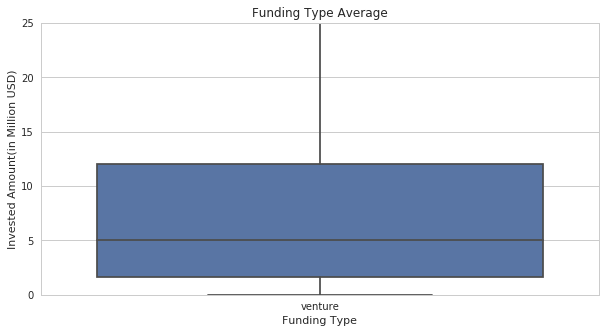

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(1, figsize = (10,5))
plt.title("Funding Type Average")
ax = sns.boxplot(x='funding_round_type',y='Million$',data = funding_plot)
ax.set(ylim=(0, 25))
ax.set(xlabel="Funding Type")
ax.set(ylabel="Invested Amount(in Million USD)")
plt.show()

**Top Countries Analysis**

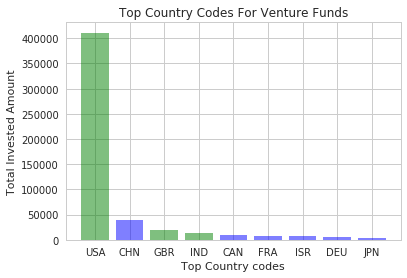

In [51]:
top_countries = top9.groupby('country_code')
top_countries_total = top_countries['Million$'].sum().sort_values(ascending=False)
y_pos = np.arange(len(top_countries_total.index))
plt.bar(y_pos, top_countries_total, align='center', color=['green', 'blue', 'green', 'green', 'blue','blue', 'blue','blue','blue'], alpha=0.5)
plt.xticks(y_pos,top_countries_total.index)
plt.ylabel('Total Invested Amount')
plt.xlabel('Top Country codes')
plt.title('Top Country Codes For Venture Funds')
plt.show()

**Top Sectors Analysis**

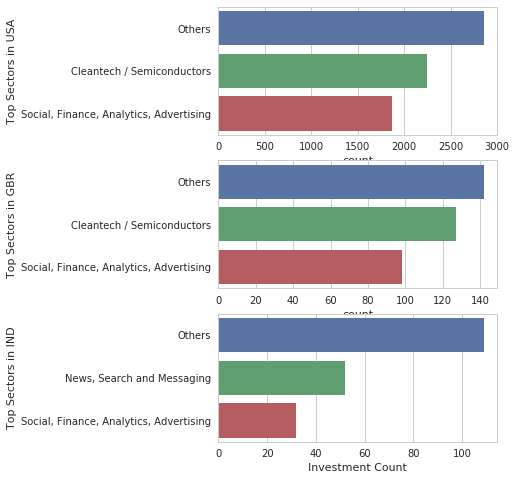

In [98]:
plt.figure(1, figsize=(5,8))
plt.subplot(3,1,1)
D1_sector_grp = D1.groupby(D1.main_sector)
sectorplot1 = pd.DataFrame({'sector':list(D1_sector_grp['Million$'].count().sort_values(ascending = False).index[0:3]),
                            'count':list(D1_sector_grp['Million$'].count().sort_values(ascending = False)[0:3])})
sns.barplot(x='count', y='sector', data=sectorplot1)
plt.ylabel('Top Sectors in USA')

plt.subplot(3,1,2)
D2_sector_grp = D2.groupby(D2.main_sector)
sectorplot2 = pd.DataFrame({'sector':list(D2_sector_grp['Million$'].count().sort_values(ascending = False).index[0:3]),
                            'count':list(D2_sector_grp['Million$'].count().sort_values(ascending = False)[0:3])})
sns.barplot(x='count', y='sector', data=sectorplot2)
plt.ylabel('Top Sectors in GBR')

plt.subplot(3,1,3)
D3_sector_grp = D3.groupby(D3.main_sector)
sectorplot3 = pd.DataFrame({'sector':list(D3_sector_grp['Million$'].count().sort_values(ascending = False).index[0:3]),
                            'count':list(D3_sector_grp['Million$'].count().sort_values(ascending = False)[0:3])})
ax=sns.barplot(x='count', y='sector', data=sectorplot3)
plt.xlabel('Investment Count')
plt.ylabel('Top Sectors in IND')
plt.show()